In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
X_train = X_train.reshape((X_train.shape[0], 28 * 28)).astype('float32') / 255
X_test = X_test.reshape((X_test.shape[0], 28 * 28)).astype('float32') / 255


In [4]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [5]:
model = Sequential()
model.add(Dense(128, input_dim=28 * 28, activation='relu'))
model.add(Dense(10, activation='softmax'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:
model.fit(X_train, y_train, epochs=10, batch_size=200, validation_data=(X_test, y_test), verbose=2)

Epoch 1/10
300/300 - 3s - 10ms/step - accuracy: 0.8905 - loss: 0.4035 - val_accuracy: 0.9361 - val_loss: 0.2261
Epoch 2/10
300/300 - 2s - 8ms/step - accuracy: 0.9457 - loss: 0.1927 - val_accuracy: 0.9516 - val_loss: 0.1634
Epoch 3/10
300/300 - 2s - 8ms/step - accuracy: 0.9582 - loss: 0.1456 - val_accuracy: 0.9641 - val_loss: 0.1294
Epoch 4/10
300/300 - 3s - 12ms/step - accuracy: 0.9669 - loss: 0.1156 - val_accuracy: 0.9655 - val_loss: 0.1136
Epoch 5/10
300/300 - 2s - 6ms/step - accuracy: 0.9725 - loss: 0.0947 - val_accuracy: 0.9692 - val_loss: 0.1022
Epoch 6/10
300/300 - 1s - 5ms/step - accuracy: 0.9775 - loss: 0.0795 - val_accuracy: 0.9728 - val_loss: 0.0893
Epoch 7/10
300/300 - 3s - 9ms/step - accuracy: 0.9813 - loss: 0.0678 - val_accuracy: 0.9755 - val_loss: 0.0800
Epoch 8/10
300/300 - 2s - 8ms/step - accuracy: 0.9835 - loss: 0.0577 - val_accuracy: 0.9754 - val_loss: 0.0803
Epoch 9/10
300/300 - 3s - 10ms/step - accuracy: 0.9863 - loss: 0.0497 - val_accuracy: 0.9760 - val_loss: 0.075

In [8]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1] * 100))

Accuracy: 97.75%


In [9]:
predictions = model.predict(X_test[:5])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


In [10]:
for i in range(5):
    print(f"Actual: {np.argmax(y_test[i])}, Predicted: {np.argmax(predictions[i])}")

Actual: 7, Predicted: 7
Actual: 2, Predicted: 2
Actual: 1, Predicted: 1
Actual: 0, Predicted: 0
Actual: 4, Predicted: 4


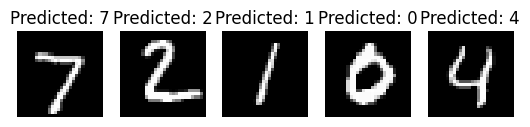

In [11]:
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {np.argmax(predictions[i])}")
    plt.axis('off')

plt.show()